#**AZATIK BATIK MOTIF CLASSIFICATION**

## Load Dataset

In [ ]:
#connecting to collab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#unzipping dataset
!unzip gdrive/My\ Drive/data/Azatik-Dataset.zip

Archive:  gdrive/My Drive/data/Azatik-Dataset.zip
   creating: Azatik-Dataset/
   creating: Azatik-Dataset/Celup/
  inflating: Azatik-Dataset/Celup/1.jpg  
  inflating: Azatik-Dataset/Celup/10.jpg  
  inflating: Azatik-Dataset/Celup/11.jpg  
  inflating: Azatik-Dataset/Celup/12.jpg  
  inflating: Azatik-Dataset/Celup/13.jpg  
  inflating: Azatik-Dataset/Celup/14.jpg  
  inflating: Azatik-Dataset/Celup/15.jpg  
  inflating: Azatik-Dataset/Celup/16.jpg  
  inflating: Azatik-Dataset/Celup/17.jpg  
  inflating: Azatik-Dataset/Celup/18.jpg  
  inflating: Azatik-Dataset/Celup/19.jpg  
  inflating: Azatik-Dataset/Celup/2.jpg  
  inflating: Azatik-Dataset/Celup/20.jpg  
  inflating: Azatik-Dataset/Celup/21.jpg  
  inflating: Azatik-Dataset/Celup/22.jpg  
  inflating: Azatik-Dataset/Celup/23.jpg  
  inflating: Azatik-Dataset/Celup/24.jpg  
  inflating: Azatik-Dataset/Celup/25.jpg  
  inflating: Azatik-Dataset/Celup/26.jpg  
  inflating: Azatik-Dataset/Celup/27.jpg  
  inflating: Azatik-Dataset/

## Splitting Dataset

In [ ]:
#import library
import os
import random
import numpy as np
import tensorflow as tf
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from pathlib import Path
import imghdr
import matplotlib.pyplot as plt
from matplotlib import style
from tensorflow.compat.v1.keras.backend import backend as K
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from keras_preprocessing import image
import zipfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception

In [ ]:
#source path folder to dataset and making labels
source_path = 'Azatik-Dataset/' 
labels = ['Tambal', 'Parang','Kawung','Celup', 'Cendrawasih']

#the split ratio
val_ratio = 0.1
test_ratio = 0.1

#path to directory
root_path = 'traintestval/'

#make directory for split dataset
os.makedirs('traintestval')
os.makedirs(os.path.join(root_path, 'training'))
os.makedirs(os.path.join(root_path, 'testing'))
os.makedirs(os.path.join(root_path, 'validation'))

#path to dataset after split
train_path = 'traintestval/training/'
test_path = 'traintestval/testing/'
val_path = 'traintestval/validation/'

#assigning label
for label in labels:
    os.makedirs(os.path.join(train_path, label))
    os.makedirs(os.path.join(test_path, label))
    os.makedirs(os.path.join(val_path, label))

#Splitting the dataset
    src = source_path + label 
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
                                                           int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
          shutil.copy(name, train_path + label)

    for name in val_FileNames:
          shutil.copy(name, val_path + label)

    for name in test_FileNames:

In [ ]:
#Image Augmentation
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Image augmentation using ImageDataGenerator
  train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10, 
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Rescaling
  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10, 
                                                                class_mode='categorical',
                                                                target_size=(150, 150),
                                                                shuffle=True)
  return train_generator, validation_generator

In [ ]:
#checking class and number of image
train_dir = train_path
validation_dir = val_path 
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 399 images belonging to 5 classes.
Found 75 images belonging to 5 classes.


In [ ]:
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(150, 150))

Found 399 files belonging to 5 classes.


In [ ]:
class_names = train_dataset.class_names

print(class_names)

['Celup', 'Cendrawasih', 'Kawung', 'Parang', 'Tambal']


In [ ]:
#checking file type
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

#making sure its accepted by tensorflow
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(source_path).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

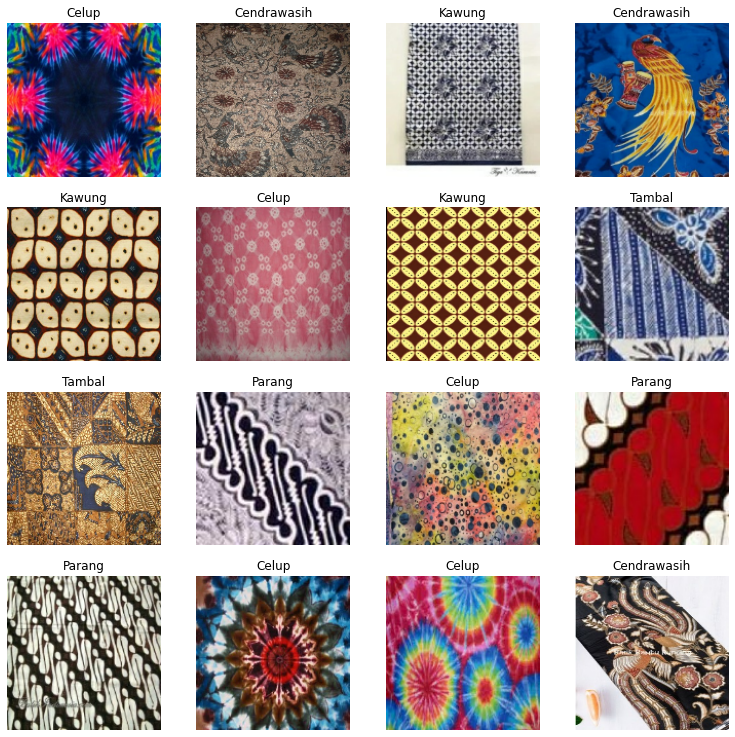

In [ ]:
#visualize the dataset
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False
  )

base_model.trainable = False

base_model.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                          

## w/Transfer Learning Xception

In [ ]:
inputs = tf.keras.Input(shape=(150, 150, 3))

x = base_model(inputs, training=False)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.01)(x)

outputs = Dense(5, activation='softmax')(x)

In [ ]:
model = Model(inputs, outputs)

model.summary()

# model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1024)              52429824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 73,296,429
Trainable params: 52,434,949
Non-tra

In [ ]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=validation_generator,
                    verbose = 1)

Epoch 1/25
13/13 [==============================] - 46s 4s/step - loss: 0.9195 - acc: 0.7694 - val_loss: 0.3925 - val_acc: 0.8533
Epoch 2/25
13/13 [==============================] - 52s 4s/step - loss: 0.7944 - acc: 0.7544 - val_loss: 0.4763 - val_acc: 0.8800
Epoch 3/25
13/13 [==============================] - 47s 4s/step - loss: 0.6455 - acc: 0.8145 - val_loss: 0.4306 - val_acc: 0.8400
Epoch 4/25
13/13 [==============================] - 45s 3s/step - loss: 0.8936 - acc: 0.7820 - val_loss: 0.7895 - val_acc: 0.7467
Epoch 5/25
13/13 [==============================] - 45s 3s/step - loss: 0.3535 - acc: 0.8872 - val_loss: 0.2947 - val_acc: 0.8667
Epoch 6/25
13/13 [==============================] - 45s 3s/step - loss: 0.6396 - acc: 0.8246 - val_loss: 0.3848 - val_acc: 0.9067
Epoch 7/25
13/13 [==============================] - 45s 3s/step - loss: 0.4393 - acc: 0.8571 - val_loss: 0.4419 - val_acc: 0.8800
Epoch 8/25
13/13 [==============================] - 45s 3s/step - loss: 0.3667 - acc: 0.88

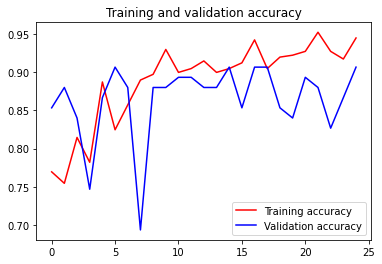

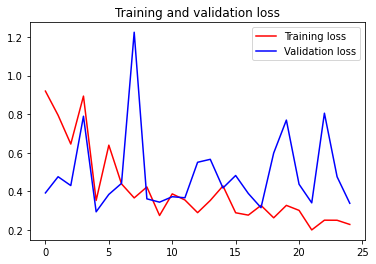

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing

Saving 1.jpg to 1.jpg


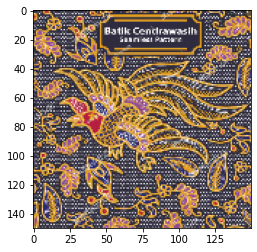

1.jpg
[1.2362938e-04 9.9962521e-01 7.8258425e-05 1.6984229e-04 3.1389166e-06]
Celup: 0.01%
Cendrawasih: 99.96%
Kawung: 0.01%
Parang: 0.02%
Tambal: 0.00%


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
image_labels = train_generator.class_indices.keys()
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  classes = model.predict(images)[0] #proba = model2.predict(images)[0]
  plt.imshow(img)
  plt.show()
  print(fn)
  print(classes)
  for (imge, pers) in zip(image_labels, classes):
    print("{}: {:.2f}%".format(imge, pers * 100))

## Saving model

In [ ]:
saved_model_path = "/content/best_model.h5"

# Save model h5
model.save(saved_model_path)

In [ ]:
version=1

In [ ]:
export_path = os.path.join(Model_Directory, str(version))
print(export_path)

/tmp/1


In [ ]:
model.save("saved_models/1/")

INFO:tensorflow:Assets written to: saved_models/1/assets
